In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

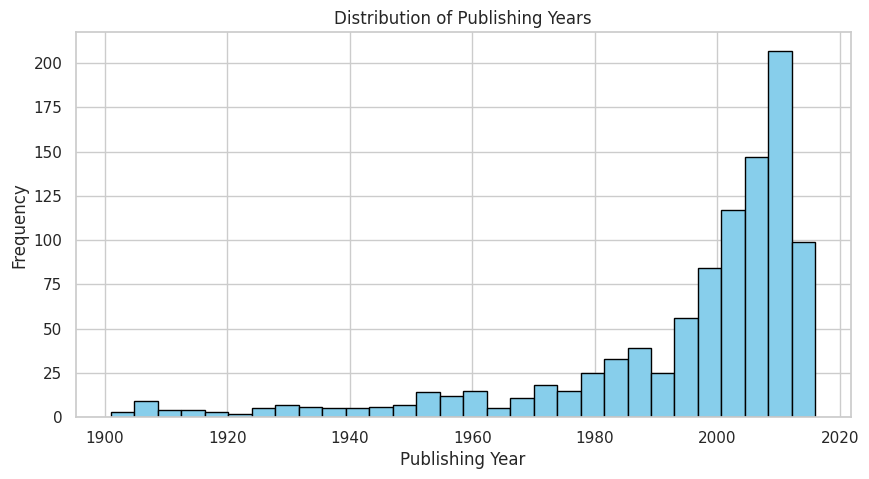

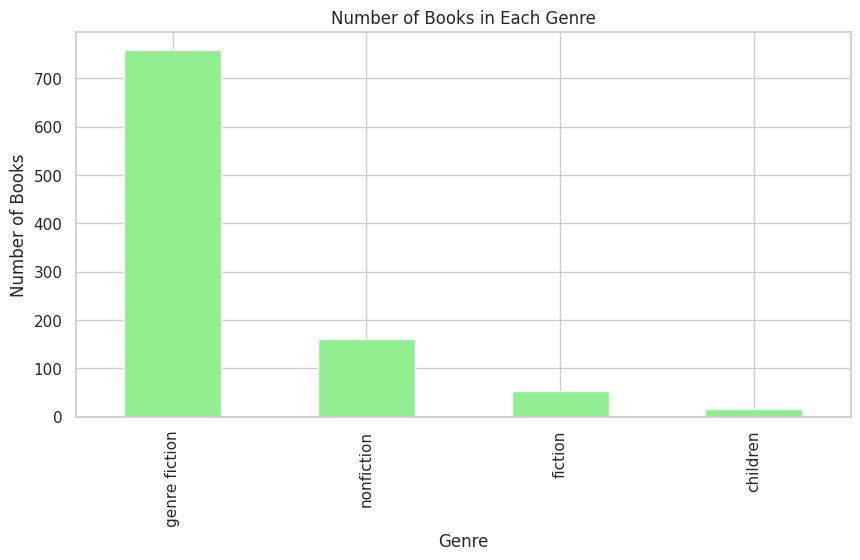

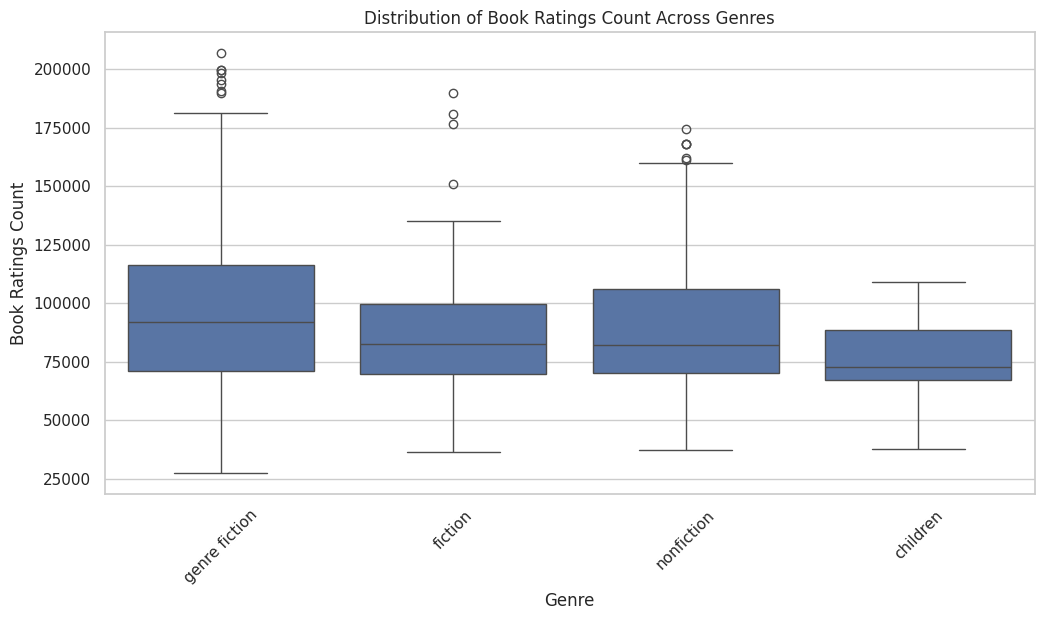

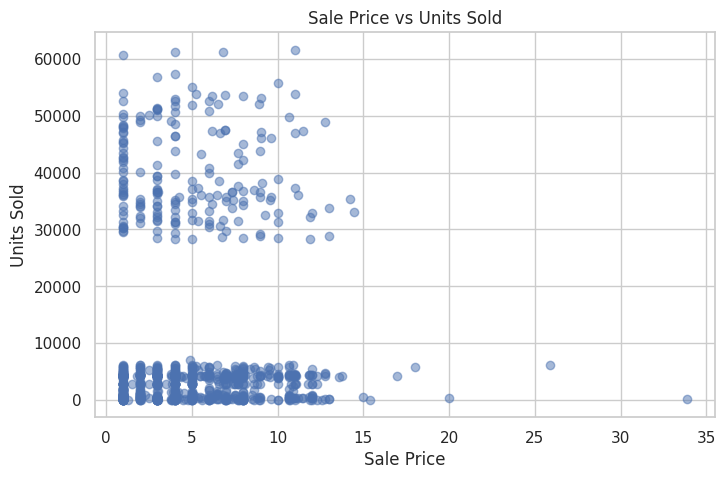

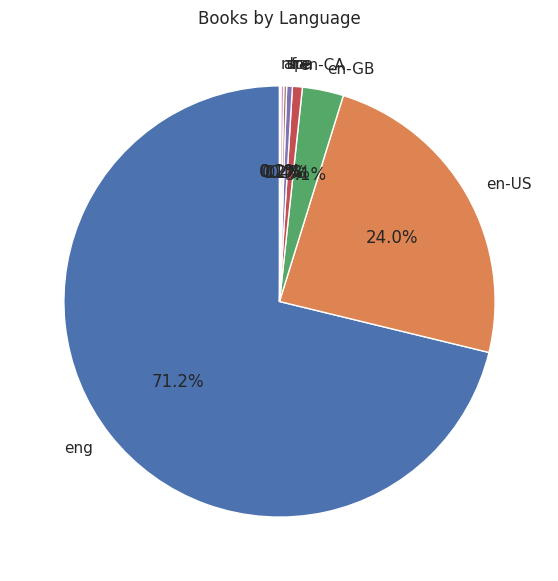

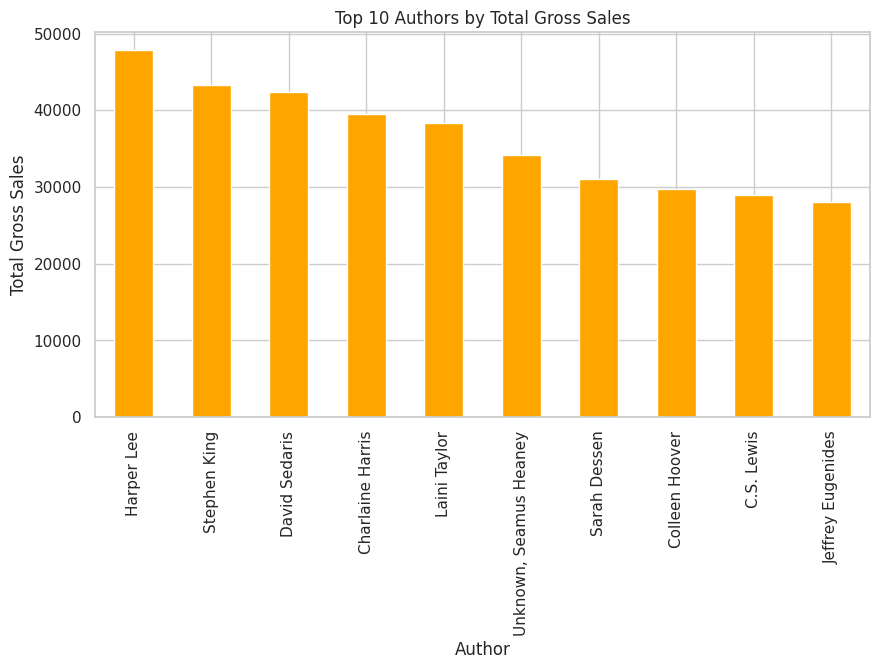

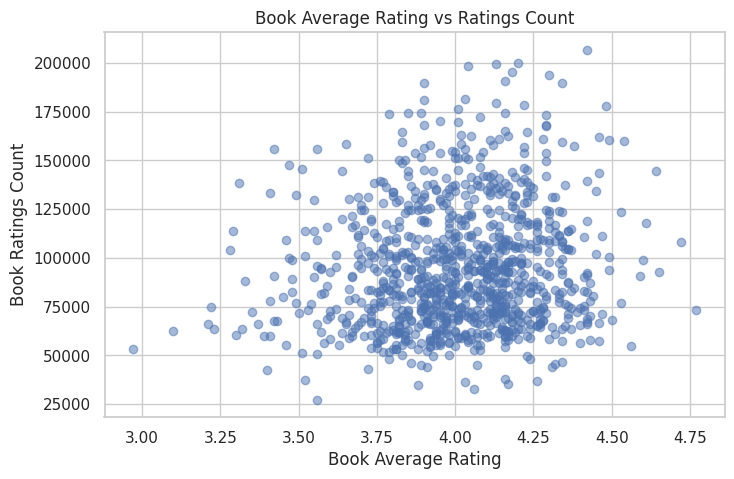

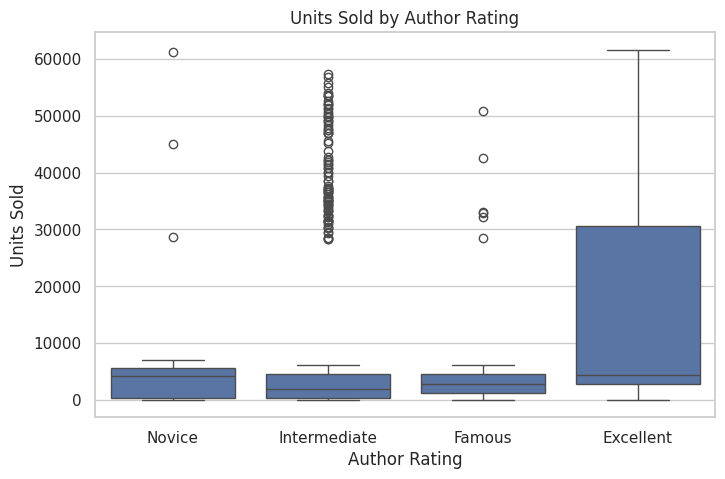

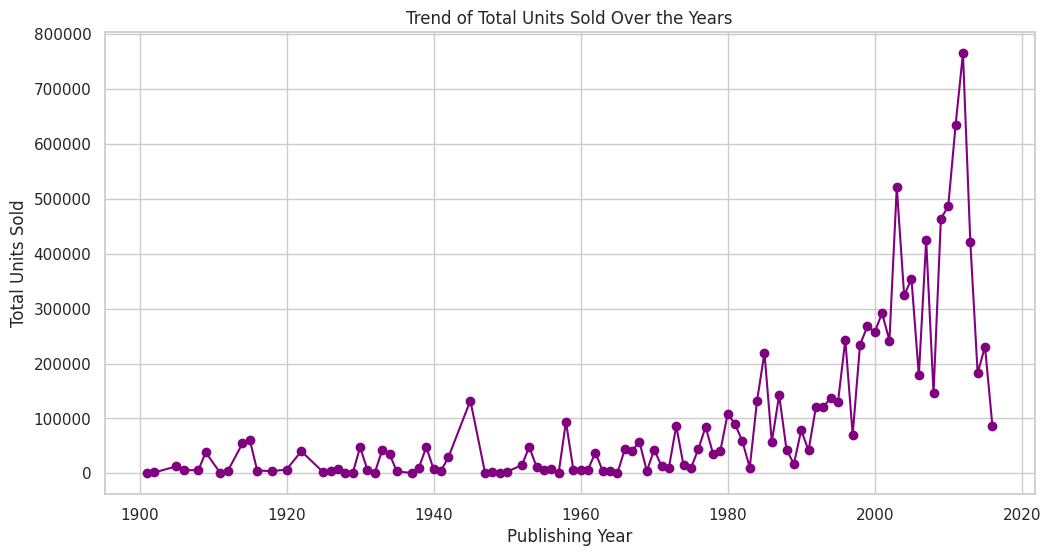

In [2]:
# ==============================
# BOOKS DATA ANALYSIS PROJECT
# ==============================

# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set seaborn style for nicer plots
sns.set(style="whitegrid")

# ------------------------------
# 2. Load Dataset
# ------------------------------
df = pd.read_csv('/content/drive/MyDrive/Project Files/Books_Data_Clean.csv')

# Display first few rows to inspect the dataset
df.head()

# ------------------------------
# 3. Data Overview
# ------------------------------
# Get basic information about dataset
df.info()

# Summary statistics for numerical columns
df.describe()

# Check missing values
df.isna().sum()

# Check number of unique values per column
df.nunique()

# Check for duplicates
df.duplicated().sum()

# ------------------------------
# 4. Data Cleaning
# ------------------------------
# Keep only books published after 1900
df = df[df['Publishing Year'] > 1900]

# Drop rows where 'Book Name' is missing
df.dropna(subset=["Book Name"], inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# ------------------------------
# 5. Exploratory Data Analysis (EDA)
# ------------------------------

# 5.1 Distribution of Publishing Years
plt.figure(figsize=(10,5))
plt.hist(df['Publishing Year'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Years")
plt.show()

# 5.2 Number of Books per Genre
plt.figure(figsize=(10,5))
df['genre'].value_counts().plot(kind="bar", color='lightgreen')
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

# 5.3 Boxplot: Book Ratings Count by Genre
plt.figure(figsize=(12,6))
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Distribution of Book Ratings Count Across Genres")
plt.xticks(rotation=45)
plt.show()

# 5.4 Sale Price vs Units Sold
plt.figure(figsize=(8,5))
plt.scatter(df["sale price"], df["units sold"], alpha=0.5)
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Sale Price vs Units Sold")
plt.show()

# 5.5 Language Distribution of Books
language_counts = df["language_code"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(language_counts, labels=language_counts.index, startangle=90, autopct="%1.1f%%")
plt.title("Books by Language")
plt.show()

# ------------------------------
# 6. Aggregated Analysis
# ------------------------------

# 6.1 Average Book Ratings by Author
avg_rating_by_author = df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)
avg_rating_by_author.head(10)

# 6.2 Max Book Ratings Count by Author Rating
max_ratings_by_author_rating = df.groupby("Author_Rating")["Book_ratings_count"].max()
max_ratings_by_author_rating

# 6.3 Total Gross Sales by Author
total_sales_by_author = df.groupby("Author")["gross sales"].sum()
plt.figure(figsize=(10,5))
total_sales_by_author.sort_values(ascending=False).head(10).plot(kind="bar", color='orange')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Top 10 Authors by Total Gross Sales")
plt.show()

# 6.4 Average Book Ratings Count by Author Rating
avg_ratings_count_by_author_rating = df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)
avg_ratings_count_by_author_rating

# ------------------------------
# 7. Advanced Visualizations
# ------------------------------

# 7.1 Scatter: Average Rating vs Ratings Count
plt.figure(figsize=(8,5))
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"], alpha=0.5)
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Book Average Rating vs Ratings Count")
plt.show()

# 7.2 Boxplot: Units Sold by Author Rating
plt.figure(figsize=(8,5))
sns.boxplot(x="Author_Rating", y="units sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Units Sold by Author Rating")
plt.show()

# 7.3 Trend of Units Sold Over the Years
plt.figure(figsize=(12,6))
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", marker="o", color='purple')
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Trend of Total Units Sold Over the Years")
plt.show()
